In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
# mpl.style.use('seaborn-notebook')

In [2]:
df = pd.read_csv("data/tonedata.csv", sep=' ')
df

,stretchratio,tuned
0,1.35,1.461
1,1.40,1.407
2,1.45,1.452
3,1.50,1.300
4,1.55,1.351
...,...,...
145,2.75,2.066
146,2.80,2.426
147,2.85,2.117
148,2.90,2.097


In [3]:
X = df.stretchratio.values.astype('d')
Xs = X.reshape(-1,1)
Y = df.tuned.values.astype('d')

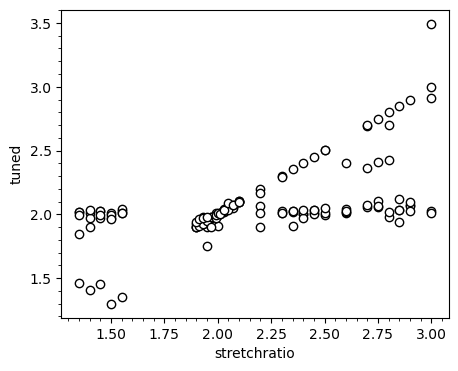

In [4]:
plt.figure(figsize=(5.0, 4.0))
plt.scatter(X, Y, s=36, c='w', edgecolors='k', linewidths=1.)
plt.minorticks_on()
plt.xlabel('stretchratio')
plt.ylabel('tuned')
# plt.savefig('fig/kmean_regression_tonedata.eps')
plt.show()

In [5]:
import mlgrad
import mlgrad.models as ml_model
import mlgrad.risks as ml_risk
import mlgrad.loss as ml_loss
import mlgrad.funcs as ml_func
import mlgrad.funcs2 as ml_func2
import mlgrad.af as ml_af

In [9]:
minloss_sq = ml_loss.SoftMinLoss(ml_loss.SquareErrorLoss(), 2, a=22)
minloss_abs = ml_loss.SoftMinLoss(ml_loss.ErrorLoss(ml_func.SoftAbs(0.01)), 2, a=22)

In [15]:
def make_models():
    layer = ml_model.GeneralModelLayer(1)
    linmod1 = ml_model.LinearModel(1)
    linmod2 = ml_model.LinearModel(1)
    # linmod3 = ml_model.LinearModel(1)
    layer.add(linmod1)
    layer.add(linmod2)
    # layer.add(linmod3)
    nn = ml_model.FFNetworkModel()
    nn.add(layer)

    nn.allocate()
    nn.init_param()
    
    return nn, linmod1, linmod2 #, linmod3

def solve(minloss):
    nn, linmod1, linmod2 = make_models()
    risk = ml_risk.ERisk2(Xs, Y, nn, minloss)
    alg = mlgrad.erm_fg(risk, n_restart=5, h=0.01, tol=1.0e-9, n_iter=3000)
    return alg, nn, linmod1, linmod2

# def rob_solve(minloss, alpha=0.98):
#     nn, linmod1, linmod2 = make_models()
#     risk = ml_risk.ERisk2(Xs, Y, nn, minloss)
#     agg_func = ml_af.averaging_function("WM", rhofunc=ml_func.QuantileFunc(alpha, ml_func.SoftAbs_Sqrt(0.01)))
#     # weights = ml_weights.MWeights(agg_func, risk)
#     _fg = mlgrad.fg(risk, h=0.1, tol=1.0e-9, n_iter=3000)
#     alg = mlgrad.erm_irgd(_fg, agg_func, tol=1.0e-7, n_restart=1, )
#     return alg, nn, linmod1, linmod2

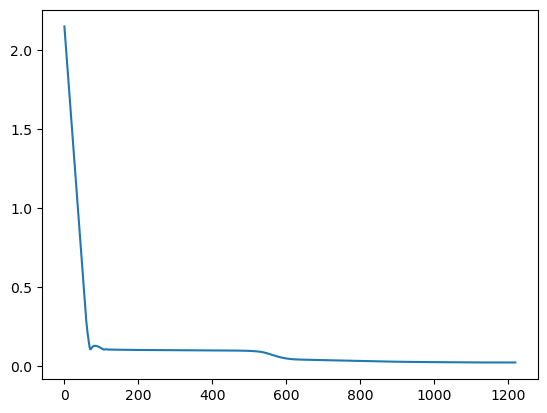

In [16]:
alg_sq, nn, linmod1, linmod2  = solve(minloss_abs)

plt.plot(alg_sq.lvals)
plt.show()

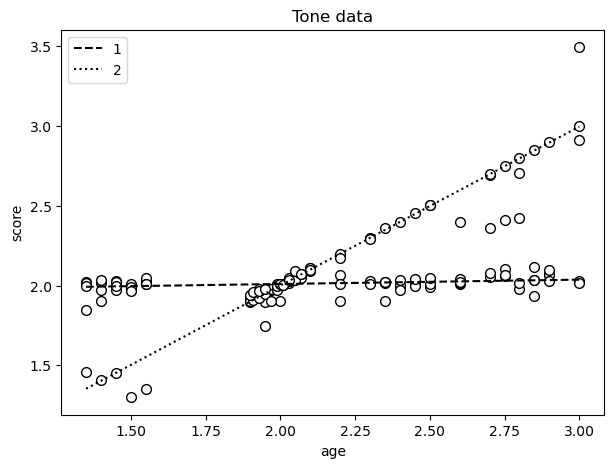

In [17]:
plt.figure(figsize=(7,5))
plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.0)
XX = np.array([X.min(), X.max()])
XXs = XX.reshape(-1,1)
plt.title('Tone data')
plt.plot(XX, linmod1.evaluate_all(XXs), linestyle='--', label='1', color='k')
plt.plot(XX, linmod2.evaluate_all(XXs), linestyle=':', label='2', color='k')
# plt.plot(XX, linmod3.evaluate_all(XXs), linestyle=':', label='2', color='k')
plt.xlabel('age')
plt.ylabel('score')
plt.legend()
plt.show()

In [19]:
# rob_alg, rob_nn, rob_linmod1, rob_linmod2, rob_linmod3 = rob_solve(minloss_abs, 0.96)

# plt.plot(rob_alg.lvals)
# plt.show()

In [20]:
# print(np.array(rob_linmod1.param))
# print(np.array(rob_linmod2.param))
# print(np.array(rob_linmod3.param))
# rob_alg.K

In [21]:
# plt.figure(figsize=(7/(16/9),5))
# # plt.figure(figsize=(15,12))
# plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.0)
# plt.title("Tone data")
# plt.plot(XX, rob_linmod1.evaluate_all(XXs), linestyle='--', label='1', color='k')
# plt.plot(XX, rob_linmod2.evaluate_all(XXs), linestyle=':', label='2', color='k')
# plt.plot(XX, rob_linmod3.evaluate_all(XXs), linestyle=':', label='3', color='k')
# plt.ylim(0, Y.max())
# plt.xlabel('age')
# plt.ylabel('score')
# plt.legend()
# # plt.savefig('fig/tonedata_scatter.eps')
# plt.show()

In [22]:
# plt.figure(figsize=(7,5))
# # plt.figure(figsize=(15,12))
# plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.0)
# plt.title("Tone data")
# plt.plot(XX, rob_linmod1.evaluate_all(XXs), linestyle='--', label='r:1', color='k')
# plt.plot(XX, rob_linmod2.evaluate_all(XXs), linestyle=':', label='r:2', color='k')
# plt.plot(XX, linmod1.evaluate_all(XXs), linestyle='--', label='1', color='m')
# plt.plot(XX, linmod2.evaluate_all(XXs), linestyle=':', label='2', color='m')
# plt.legend()
# # plt.savefig('fig/tonedata_scatter.eps')
# plt.show()

In [23]:
# plt.plot(sorted(rob_alg.risk.evaluate_losses()), label='robust')
# plt.plot(sorted(alg_sq.risk.evaluate_losses()), label='usual')
# plt.legend()
# plt.show()